# I. Overview

The objective of this assignment is to implement deep learning. I loaded the classification data, partitioned it based on requirements, visualized the data, trained it using neural networks and the results are plotted. I have used various network structures with various number of nodes in each hidden layers. The layers are analyzed based on various networks. Tensor flow has been used to train and use the deep neural networks. Other task is to know the information about which network should be used for a problem.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import seaborn as sns

# Data

## Description

In this dataset we have to predict the **sales price of houses in King County, Seattle**. It includes homes sold between May 2014 and May 2015. Before doing anything we should first know about the dataset what it contains what are its features and what is the structure of data.

The dataset cantains 20 house features plus the price, along with 21613 observations.

The description for the 20 features is given below:

1. id :- It is the unique numeric number assigned to each house being sold.
2. date :- It is the date on which the house was sold out.
3. price:- It is the price of house which we have to predict so this is our target variable and aprat from it are our features.
4. bedrooms :- It determines number of bedrooms in a house.
5. bathrooms :- It determines number of bathrooms in a bedroom of a house.
6. sqft_living :- It is the measurement variable which determines the measurement of house in square foot.
7. sqft_lot : It is also the measurement variable which determines square foot of the lot.
8. floors: It determines total floors means levels of house.
9. waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 means yes.
10. view : This feature determines whether a house has been viewed or not 0 means no 1 means yes.
11. condition : It determines the overall condition of a house on a scale of 1 to 5.
12. grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11
13. sqft_above : It determines square footage of house apart from basement.
14. sqft_basement : It determines square footage of the basement of the house.
15. yr_built : It detrmines the date of building of the house.
16. yr_renovated : It detrmines year of renovation of house.
17. zipcode : It determines the zipcode of the location of the house.
18. lat : It determines the latitude of the location of the house.
19. long : It determines the longitude of the location of the house.
20. sqft_living15 : Living room area in 2015(implies-- some renovations)
21. sqft_lot15 : lotSize area in 2015(implies-- some renovations)

By observing the data, we can know that the **price is dependent on various features** like bedrooms(which is most dependent feature), bathrooms, sqft_living(second most important feature), sqft_lot, floors etc. The price is also dependent on the location of the house where it is present. The other features like waterfront, view are less dependent on the price. Of all the records, there are **no missing values, which helps us creating better model.** 

First, we **import** the required libraries like pandas, numpy, seaborn, matplotlib. Now import the **csv file.** Now we should get to know how the data is, what datatype using info function. We observe that date is in 'object' format. To know the no of rows and columns we use shape function. Describe the dataframe to know the mean, minumum, ,maximum, standard deviation, percentiles. 

Now, find if there are any null values. Luckily, there are no null values which helps us in getting the accurate model. We drop the unnecessary columns ike 'lat', 'long', 'view'. **There is an outlier in the given data.** Although it is not exactly a outlier, i would like to remove the value so that we can obtain better graph. The **no of bedrooms is '33'** for one observation. I removed that value. 

The **date is in object format, so it is converted into date format** using pandas. Now, the graphs are plotted for better understanding or better analysis. The graphs like relplot, boxplot, heatplot, lineplot, catplot are used for analysis.


In [2]:
data = pd.read_csv('/content/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#conevrting data column into float type
pd.options.display.float_format = '{:,.0f}'.format
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900",3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,48,-122,1340,5650
1,6414100192,20141209T000000,"538,000",3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,48,-122,1690,7639
2,5631500400,20150225T000000,"180,000",2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,48,-122,2720,8062
3,2487200875,20141209T000000,"604,000",4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,48,-122,1360,5000
4,1954400510,20150218T000000,"510,000",3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,48,-122,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,"360,000",3,2,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,48,-122,1530,1509
21609,6600060120,20150223T000000,"400,000",4,2,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,48,-122,1830,7200
21610,1523300141,20140623T000000,"402,101",2,1,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,48,-122,1020,2007
21611,291310100,20150116T000000,"400,000",3,2,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,48,-122,1410,1287


In [4]:

#formatting the unncessary values in data column
data['date']=[x[:8] for x in data['date']]
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,"221,900",3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,48,-122,1340,5650
1,6414100192,20141209,"538,000",3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,48,-122,1690,7639
2,5631500400,20150225,"180,000",2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,48,-122,2720,8062
3,2487200875,20141209,"604,000",4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,48,-122,1360,5000
4,1954400510,20150218,"510,000",3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,48,-122,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521,"360,000",3,2,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,48,-122,1530,1509
21609,6600060120,20150223,"400,000",4,2,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,48,-122,1830,7200
21610,1523300141,20140623,"402,101",2,1,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,48,-122,1020,2007
21611,291310100,20150116,"400,000",3,2,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,48,-122,1410,1287


In [0]:
# Partitioning into training and testing
N = data.shape[0]
ratio = 0.8
N1 = int(ratio*N)
Train = data[:N1]
Test = data[N1:]

In [0]:
if 'condition' in Train.columns:
    XTrainA = np.array(Train[Train['condition']=='1']) 
    XTrainB = np.array(Train[Train['condition']!='1'])

In [0]:
if 'condition' in Train.columns:
    yTrain = pd.DataFrame(Train['condition'].copy())
    del Train['condition']
if 'condition' in Test.columns:
    yTest = pd.DataFrame(Test['condition'].copy())
    del Test['condition']

In [0]:
yTrain[yTrain['condition']=='1'] = 1
yTrain[yTrain['condition']!=1] = 0
yTest[yTest['condition']=='1'] = 1
yTest[yTest['condition']!=1] = 0

In [9]:
notyTrain = (yTrain+1)%2
newyTrain = (notyTrain.T.append(yTrain.T)).T
newyTrain.shape

(17290, 2)

In [10]:
# Creating dummies for output variable for testing data
notyTest = (yTest+1)%2
newyTest = (notyTest.T.append(yTest.T)).T
newyTest.shape

(4323, 2)

## Plots to Visualize data
A plot is a graphical technique for representing a data set, usually as a graph showing the relationship between two or more variables. Graphs are a visual representation of the relationship between variables, which are very useful for humans who can then quickly derive an understanding which may not have come from lists of values.

We have plotted the graphs like **replot, boxplot, heatmap, lineplot, catplot, 3d graph**. We plotted graphs between price, bedrooms, bathrooms, sqft_living, sqft_lot, date of purchase, condition for analyzing the data. Relplot is ised to find the relation between bedrooms and price. We plotted boxplot for further understanding. A graph is plotted between bathrooms and price. Heatmap is plotted between all the columns for finding correlation. 

> A plot is plotted for finding dates vs price. Graphs are plotted for finding the relationship between sqft_living vs price, sqft_lot vs price, condition vs price.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

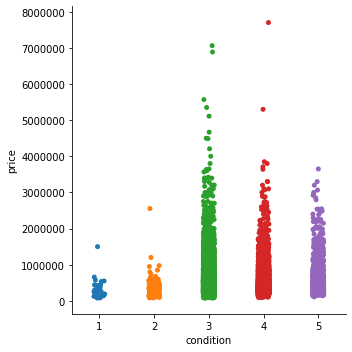

In [12]:
#catplot for condition and price
sns.catplot(x='condition',y='price',data=data)

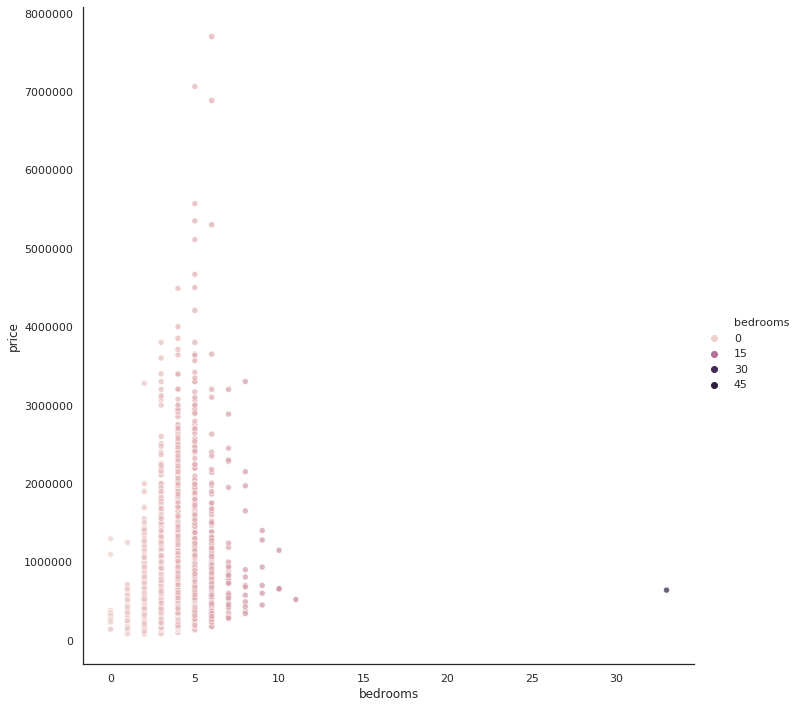

In [13]:
#replot for bedrooms and price
sns.set(style='white')
sns.relplot(x='bedrooms',y='price',hue='bedrooms',alpha=0.7,height=10,data=data)

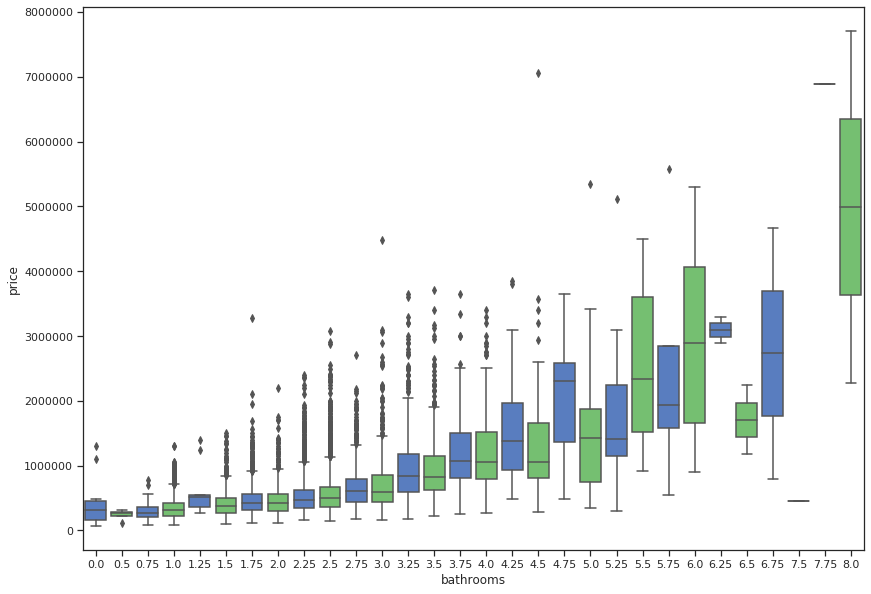

In [14]:
#boxplot between bathrooms and price
sns.set(style='ticks',palette='muted')
fig,ax=plt.subplots(figsize=(14,10))
sns.boxplot(x='bathrooms',y='price',palette=["b", "g"],data=data,ax=ax)

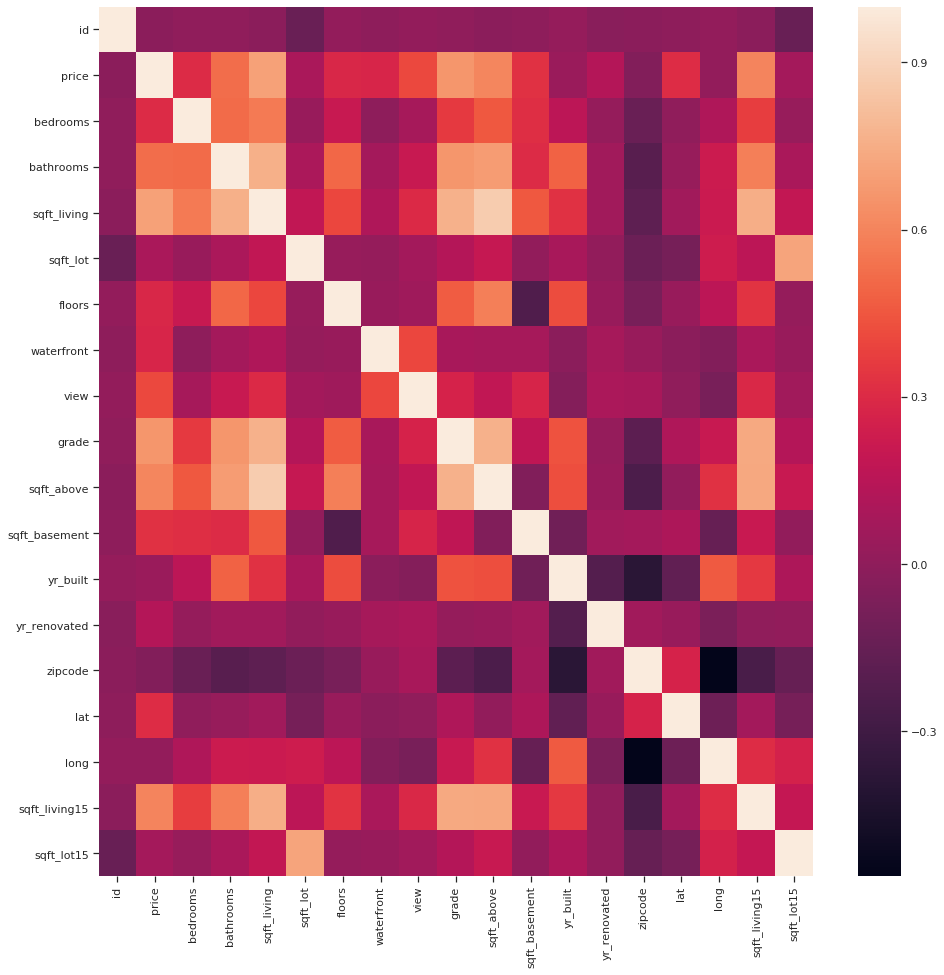

In [15]:
import seaborn as sb
plt.figure(figsize=(16,16))
sb.heatmap(Train.corr())

# Preliminary Observation

After observing the data and graphs carefully, we can observe that the price is mostly dependent on the location, no of bedrooms, bathrooms, sqft living, sqft lot, floors, condition. We can note a few points:

(1) The frequency of no of bedrooms=3,4 is higher than any other bedrooms. The price of these are mostly similar, but some have giher price than usual because of the other features like bathrooms, location, etc.

(2) The heatmap identifies the correlations between the features which help us in identifying how the features are dependent on each other which cannot be known by seeing the data. (Example: sqft living is dependent on grade of the house)

(3) The highest priced houses are sold in months: 9th to 11th. This shows people tend to spend more money on houses which are having more comforts in winter.

(4) Most of the houses have sqft living in between 500 to 6000 irrespective of no of bedrooms. The higer the living space, the higher is the cost.

(5) Price of the house is also dependent on sqft of lot (parking) as most people own their own car.

(6) People are tending to pay less if the condition of the house is bad. They are spending more if the house is in good condition.

(7) The 3d plot gives relationship between multiple features.

# III. Methods

In this assignment, you are build a deep network with more than 5 layers using TensorFlow. 
Looking at the chart below, get some idea about how you can construct your networks for what problem and why you pick your structure. 

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow codes. 
- Explain how you apply your model to your data. 

Following images are only for you to get some idea. You do not necessarily stick with these. You can come up with your own structure or shape. 


## Explanation of the choice for 3 different neural network structures and reason for the selection

The input layer consists of various 16 number of features in X. Output layer consists of 2 units i.e., whether the condition is '1' or not. Since we are not dealing with images, 1 or 2 layers will be sufficient for general binary classification with 16 features. But we will be checking this problem with 5, 6 and 7 hidden layers.

### Network1

In the first network, there are 5 hidden layers. The number of nodes in each layer gradually decreases by each layer from input to output. The first, second, third, fourth and fifth hidden layers consists of 12, 10, 8, 6, 4 units respectively. One of the reason for choosing such network is because of the higher number of features when compared to output classes. Here, the input features are gradually generalized and each consecutive layer comes up with fewer units. At the end, we end up with output layer with 2 units.

In [0]:
#Defining network
def network1(x, weights, biases, keep_prob):
    layer_1 = tf.add(tf.matmul(x, weights['hid1']), biases['bias1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_1 = tf.nn.dropout(layer_1, keep_prob)
    layer_2 = tf.add(tf.matmul(layer_1, weights['hid2']), biases['bias2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_2 = tf.nn.dropout(layer_2, keep_prob)
    layer_3 = tf.add(tf.matmul(layer_2, weights['hid3']), biases['bias3'])
    layer_3 = tf.nn.relu(layer_3)
    layer_3 = tf.nn.dropout(layer_3, keep_prob)
    layer_4 = tf.add(tf.matmul(layer_3, weights['hid4']), biases['bias4'])
    layer_4 = tf.nn.relu(layer_4)
    layer_4 = tf.nn.dropout(layer_4, keep_prob)
    layer_5 = tf.add(tf.matmul(layer_4, weights['hid5']), biases['bias5'])
    layer_5 = tf.nn.relu(layer_5)
    layer_5 = tf.nn.dropout(layer_5, keep_prob)
    output_layer = tf.matmul(layer_5, weights['out']) + biases['out']
    return output_layer

In [0]:
#Initializing number of units for each layer
n_hidden_1 = 12
n_hidden_2 = 10
n_hidden_3 = 8
n_hidden_4 = 6
n_hidden_5 = 4
n_input = Train.shape[1]
n_classes = newyTrain.shape[1]
#Initializing Weights with random values
weights = {
    'hid1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'hid2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'hid3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'hid4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
    'hid5': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5])),
    'out': tf.Variable(tf.random_normal([n_hidden_5, n_classes]))
}
#Initializing biases with random values
biases = {
    'bias1': tf.Variable(tf.random_normal([n_hidden_1])),
    'bias2': tf.Variable(tf.random_normal([n_hidden_2])),
    'bias3': tf.Variable(tf.random_normal([n_hidden_3])),
    'bias4': tf.Variable(tf.random_normal([n_hidden_4])),
    'bias5': tf.Variable(tf.random_normal([n_hidden_5])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

keep_prob = tf.placeholder("float")

In [0]:
# Initialize parameters
training_epochs = 50
view = 10
batch_size = 64

x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [19]:
predictions = network1(x, weights, biases, keep_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y)) 

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost) # Using Adamoptimizer

Epoch:  1 cost= 114763894.50529362
Epoch: 11 cost= 45484255.92691908
Epoch: 21 cost= 26907459.10815820
Epoch: 31 cost= 12253874.31042238
Epoch: 41 cost= 3634177.81317634
Optimization Finished!
Accuracy: 0.9988434


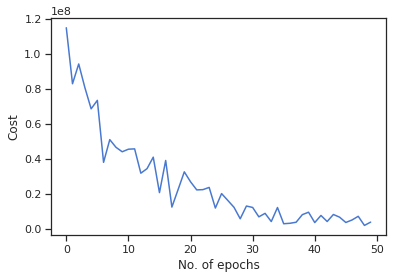

In [22]:
# Session block
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    epochcost = np.zeros(training_epochs)
    accuracyarray = np.zeros(training_epochs)
    for epoch in range(training_epochs):
        avg_cost = 0.0
        partitions = int(len(Train) / batch_size)
        # Create batches of data
        x_batches = np.array_split(Train, partitions)
        y_batches = np.array_split(newyTrain, partitions)
        for i in range(partitions):
            batch_x, batch_y = x_batches[i], y_batches[i]
            _, c = sess.run([optimizer, cost], 
                            feed_dict={
                                x: batch_x, 
                                y: batch_y, 
                                keep_prob: 0.8})
            avg_cost += c / partitions
        #Displaying for n epochs
        if epoch % view == 0:
            print("Epoch:", '%2d' % (epoch+1), "cost=", \
                "{:.8f}".format(avg_cost))
        #Store cost value for each epoch
        epochcost[epoch] = avg_cost
        correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
        #Store cost value for each epoch
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        accuracyarray[epoch] =  accuracy.eval({x: Test, y: newyTest, keep_prob: 1.0})
    print("Optimization Finished!")
    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: Test, y: newyTest, keep_prob: 1.0}))
    #Display cost graph
    plt.plot(epochcost)
    plt.xlabel('No. of epochs')
    plt.ylabel('Cost')

Text(0, 0.5, 'Accuracy')

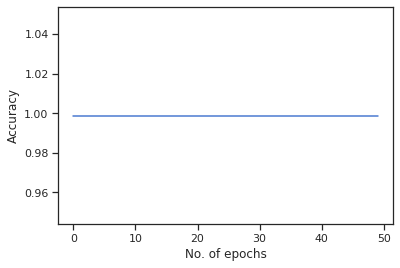

In [23]:
#Display accuracy graph
plt.plot(accuracyarray)
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy')

### Network2

In the second network, the number of nodes are initially increased until the middle of the network and then gradually decreased.
The first, second, third, fourth, fifth and sixth hidden layers consists of 20, 24, 20, 16, 8 and 4 units respectively. This is to be done when we have very less features. If we assume the middle layer as input layer, we observe from the middle of the network, it looks similar to the first network with decreasing units in each layer. So, the number of features are increased so that we can have better data which results in a good model.

In [0]:
def network2(x, weights, biases, keep_prob):
    layer_1 = tf.add(tf.matmul(x, weights['hid1']), biases['bias1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_1 = tf.nn.dropout(layer_1, keep_prob)
    layer_2 = tf.add(tf.matmul(layer_1, weights['hid2']), biases['bias2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_2 = tf.nn.dropout(layer_2, keep_prob)
    layer_3 = tf.add(tf.matmul(layer_2, weights['hid3']), biases['bias3'])
    layer_3 = tf.nn.relu(layer_3)
    layer_3 = tf.nn.dropout(layer_3, keep_prob)
    layer_4 = tf.add(tf.matmul(layer_3, weights['hid4']), biases['bias4'])
    layer_4 = tf.nn.relu(layer_4)
    layer_4 = tf.nn.dropout(layer_4, keep_prob)
    layer_5 = tf.add(tf.matmul(layer_4, weights['hid5']), biases['bias5'])
    layer_5 = tf.nn.relu(layer_5)
    layer_5 = tf.nn.dropout(layer_5, keep_prob)
    layer_6 = tf.add(tf.matmul(layer_5, weights['hid6']), biases['bias6'])
    layer_6 = tf.nn.relu(layer_6)
    layer_6 = tf.nn.dropout(layer_6, keep_prob)
    output_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return output_layer

In [0]:
n_hidden_1 = 20
n_hidden_2 = 24
n_hidden_3 = 20
n_hidden_4 = 16
n_hidden_5 = 8
n_hidden_6 = 4
n_input = Train.shape[1]
n_classes = newyTrain.shape[1]

weights = {
    'hid1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'hid2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'hid3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'hid4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
    'hid5': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5])),
    'hid6': tf.Variable(tf.random_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.random_normal([n_hidden_6, n_classes]))
}

biases = {
    'bias1': tf.Variable(tf.random_normal([n_hidden_1])),
    'bias2': tf.Variable(tf.random_normal([n_hidden_2])),
    'bias3': tf.Variable(tf.random_normal([n_hidden_3])),
    'bias4': tf.Variable(tf.random_normal([n_hidden_4])),
    'bias5': tf.Variable(tf.random_normal([n_hidden_5])),
    'bias6': tf.Variable(tf.random_normal([n_hidden_6])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

keep_prob = tf.placeholder("float")

In [0]:
training_epochs = 50
view = 10
batch_size = 64

x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [0]:
predictions = network2(x, weights, biases, keep_prob)

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

Epoch:  1 cost= 7933526835442.73242188
Epoch: 11 cost= 311939114568.05944824
Epoch: 21 cost= 52776409329.60018921
Epoch: 31 cost= 18241629312.50496292
Epoch: 41 cost= 9345307960.51731682
Optimization Finished!
Accuracy: 0.9988434


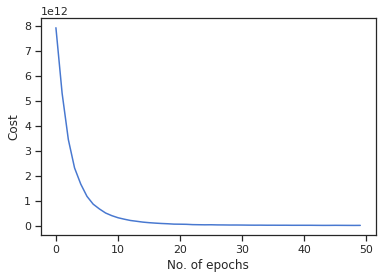

In [30]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    epochcost = np.zeros(training_epochs)
    accuracyarray = np.zeros(training_epochs)
    for epoch in range(training_epochs):
        avg_cost = 0.0
        partitions = int(len(Train) / batch_size)
        x_batches = np.array_split(Train, partitions)
        y_batches = np.array_split(newyTrain, partitions)
        for i in range(partitions):
            batch_x, batch_y = x_batches[i], y_batches[i]
            _, c = sess.run([optimizer, cost], 
                            feed_dict={
                                x: batch_x, 
                                y: batch_y, 
                                keep_prob: 0.8
                            })
            avg_cost += c / partitions
        if epoch % view == 0:
            print("Epoch:", '%2d' % (epoch+1), "cost=", \
                "{:.8f}".format(avg_cost))
        epochcost[epoch] = avg_cost
        correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        accuracyarray[epoch] =  accuracy.eval({x: Test, y: newyTest, keep_prob: 1.0})
    print("Optimization Finished!")
    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: Test, y: newyTest, keep_prob: 1.0}))
    plt.plot(epochcost)
    plt.xlabel('No. of epochs')
    plt.ylabel('Cost')

Text(0, 0.5, 'Accuracy')

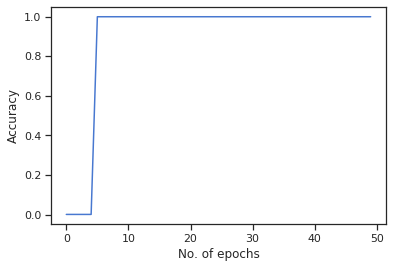

In [31]:
plt.plot(accuracyarray)
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy')

### Network3
Here, the number of units in each layer are not gradually decreasing. Instead they are in a zigzag form. One of the reason is that decreasing numbers of hidden units force generalization and reduce the accuracy of the model. The first, second, third, fourth, fifth, sixth and seventh hidden layers consists of 8, 4, 8, 4, 8, 4 and 2 respectively. Here, even we have increased the number of layers to 7 and the average number of units in each layer is 6. This is to check whether the accuracy increases with increase in number of layers.

In [0]:
def network3(x, weights, biases, keep_prob):
    layer_1 = tf.add(tf.matmul(x, weights['hid1']), biases['bias1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_1 = tf.nn.dropout(layer_1, keep_prob)
    layer_2 = tf.add(tf.matmul(layer_1, weights['hid2']), biases['bias2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_2 = tf.nn.dropout(layer_2, keep_prob)
    layer_3 = tf.add(tf.matmul(layer_2, weights['hid3']), biases['bias3'])
    layer_3 = tf.nn.relu(layer_3)
    layer_3 = tf.nn.dropout(layer_3, keep_prob)
    layer_4 = tf.add(tf.matmul(layer_3, weights['hid4']), biases['bias4'])
    layer_4 = tf.nn.relu(layer_4)
    layer_4 = tf.nn.dropout(layer_4, keep_prob)
    layer_5 = tf.add(tf.matmul(layer_4, weights['hid5']), biases['bias5'])
    layer_5 = tf.nn.relu(layer_5)
    layer_5 = tf.nn.dropout(layer_5, keep_prob)
    layer_6 = tf.add(tf.matmul(layer_5, weights['hid6']), biases['bias6'])
    layer_6 = tf.nn.relu(layer_6)
    layer_6 = tf.nn.dropout(layer_6, keep_prob)
    layer_7 = tf.add(tf.matmul(layer_6, weights['hid7']), biases['bias7'])
    layer_7 = tf.nn.relu(layer_7)
    layer_7 = tf.nn.dropout(layer_7, keep_prob)

    output_layer = tf.matmul(layer_7, weights['out']) + biases['out']
    return output_layer

In [0]:
n_hidden_1 = 8
n_hidden_2 = 4
n_hidden_3 = 8
n_hidden_4 = 4
n_hidden_5 = 8
n_hidden_6 = 4
n_hidden_7 = 2
n_input = Train.shape[1]
n_classes = newyTrain.shape[1]

weights = {
    'hid1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'hid2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'hid3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'hid4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
    'hid5': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5])),
    'hid6': tf.Variable(tf.random_normal([n_hidden_5, n_hidden_6])),
    'hid7': tf.Variable(tf.random_normal([n_hidden_6, n_hidden_7])),
    'out': tf.Variable(tf.random_normal([n_hidden_7, n_classes]))
}

biases = {
    'bias1': tf.Variable(tf.random_normal([n_hidden_1])),
    'bias2': tf.Variable(tf.random_normal([n_hidden_2])),
    'bias3': tf.Variable(tf.random_normal([n_hidden_3])),
    'bias4': tf.Variable(tf.random_normal([n_hidden_4])),
    'bias5': tf.Variable(tf.random_normal([n_hidden_5])),
    'bias6': tf.Variable(tf.random_normal([n_hidden_6])),
    'bias7': tf.Variable(tf.random_normal([n_hidden_7])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

keep_prob = tf.placeholder("float")

In [0]:
training_epochs = 50
view = 10
batch_size = 64

x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [0]:

predictions = network3(x, weights, biases, keep_prob)

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

Epoch:  1 cost= 50885732492.32596588
Epoch: 11 cost= 2773120236.26260138
Epoch: 21 cost= 550175634.85135019
Epoch: 31 cost= 143514652.86012843
Epoch: 41 cost= 40652616.76530357
Optimization Finished!
Accuracy: 0.9988434


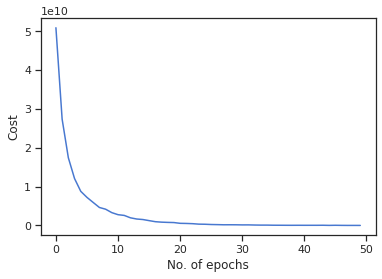

In [38]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    epochcost = np.zeros(training_epochs)
    accuracyarray = np.zeros(training_epochs)
    for epoch in range(training_epochs):
        avg_cost = 0.0
        partitions = int(len(Train) / batch_size)
        x_batches = np.array_split(Train, partitions)
        y_batches = np.array_split(newyTrain, partitions)
        for i in range(partitions):
            batch_x, batch_y = x_batches[i], y_batches[i]
            _, c = sess.run([optimizer, cost], 
                            feed_dict={
                                x: batch_x, 
                                y: batch_y, 
                                keep_prob: 0.8
                            })
            avg_cost += c / partitions
        if epoch % view == 0:
            print("Epoch:", '%2d' % (epoch+1), "cost=", \
                "{:.8f}".format(avg_cost))
        epochcost[epoch] = avg_cost
        correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        accuracyarray[epoch] =  accuracy.eval({x: Test, y: newyTest, keep_prob: 1.0})
    print("Optimization Finished!")
    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: Test, y: newyTest, keep_prob: 1.0}))
    plt.plot(epochcost)
    plt.xlabel('No. of epochs')
    plt.ylabel('Cost')

Text(0, 0.5, 'Accuracy')

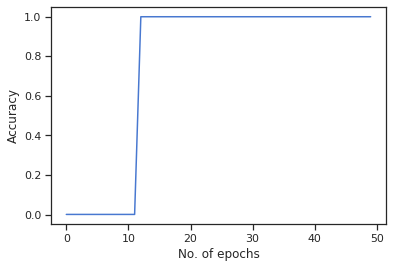

In [39]:
plt.plot(accuracyarray)
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy')

## Explanation of codes for each structure

In three of the cases, at first the network is created with required number of layers. And then weights and biases are randomly initialized. Training epochs and batch size is initialized.

### Network1
AdamOptimizer is used. The number of units for each hidden layer from 1 to 5 are initiated and the the session is started. Layers are initiated by multiplying the weights with the previous layer.

### Network2
Learning rate is also initialized. It is same for three of the networks. The number of epochs, optimizer and learning rate is kept constant so that we can examine the results based on just the network. Data is divided based on the batch size. Arrays are initiated to store values of accuracy and cost for each epoch. These are updated during each epoch

### Network3
Instead of calculating the accuracy at the end, cost and accuracy are calculated for each epoch and plotted. The plots are analysed and a detailed description of them is given. Cost is displayed based on display step. 

## Explanation of experimental codes

Based on the intiated values, some networks are behaving in a different manner when executed again. The results are changing when we implement it multiple times. Again, while implementing these codes, the exact results may not be reproduced. The learning is also changing for each network based on this. Data is partitioned based on various conditions and different visualizations are done. Matplotlib is used to plot these visualizations. Xlabel and Ylabel attributes are used to display the axis names. The boolean condition inside the dataframe is used to partition the data.

# IV - Results

- Presents the results of applications of your deep networks.
- Visualize the results 
- Discuss about the choice of network structures and performance of it as you change the structures.  
- What do you think about the results? 

## Plots for Results

The plot for number of epochs vs cost is plotted for 3 networks while implementing them itself. We can observe that the cost is lesser for the 3rd network with 7 layers with a few epochs itself. In every network, the cost is decreasing with increase in iterations and after some iterations, the decerease in cost is not considerable. Similarly, with increase in number of epochs, the accuracy has been increasing to an extent and after some optimum value it is not increasing. We can observe third network is performing very well in No. of epochs vs Accuracy graph also.


## Discussions about the choice of network structures

The number of layers in first, second and third network are 5, 6 and 7 respectively. These are selected to inspect the change in accuracy with increase in number of hidden layers. In the first network, the number of units in each hidden layer from input to output are gradually decreasing. In the second network, the number of nodes are initially increased until the middle of the network and then gradually decreased. In the third network, the number of units in each layer are in zigzag form. Number of nodes are increased, decreased and then again increased. Values are stored using numpy arrays at each iteration and then they are plot using matplotlib libraries. At the end, three of them are performing with a good accuracy. But the model with 7 layers is learning quickly. Though after some epochs, all the models are performing similarly.


# Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

1. Through this assignment,learnt a lot about the library tensorflow, how it works its functions and implementation.
2. learnt about various neural network structures and their corresponding effect on the accuracy.
3. Learnt a lot about the influence of various parameters and learning rate on predicting results
